<a href="https://colab.research.google.com/github/robingenz/htwg-machine-learning-exercises/blob/main/exercises/01_Explorative_Analyse_und_PCA/01-explorative-analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explorative Analyse des Datensatzes ''Boston Housing''

## Setup

### Einbinden von Paketen

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

np.__version__, pd.__version__, sns.__version__

('1.23.4', '1.5.0', '0.12.0')

In [2]:
%load_ext version_information
%version_information

Software versions
Python 3.10.8 64bit [GCC 10.2.1 20210110]
IPython 8.5.0
OS Linux 5.10.104 linuxkit aarch64 with glibc2.31
Sat Oct 29 14:02:15 2022 UTC

### Einlesen der Daten

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B',
        'LSTAT','TGT']
eData = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, 
                     index_col=False)
dateDownloaded = !date #Calling Linux
dateDownloaded

['Sat Oct 29 14:02:16 UTC 2022']

## Aufbereitung

Darstellung des Datensatzes als Datensatzes als Pandas-Dataframe (Tabelle der ersten und letzten 30 Einträge, Anzahl Reihen und Spalten). 

Konvention: Variablen sind die Spalten, einzelne Messungen die Zeilen.

In [4]:
eData

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Kürzere Darstellung mit `head()`: nur die ersten 5 Einträge des Tabellenkopfes

In [5]:
eData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Bedeutung der Variablen**:
- `CRIM` - Pro-Kopf-Verbrechensrate nach Stadt
- `ZN` - Anteil der Wohnbauflächen, die für Grundstücke über 25.000 m² ausgewiesen sind
- `INDUS` - Anteil der Flächen für Nicht-Einzelhandelsunternehmen pro Stadt
- `CHAS` - Charles River Dummy-Variable (1, wenn das Gebiet an den Fluss grenzt; sonst 0)
- `NOX` - Konzentration von Stickstoffoxiden (Teile pro 10 Millionen)
- `RM` - durchschnittliche Anzahl der Zimmer pro Wohnung
- `AGE` - Anteil der Eigentumswohnungen, die vor 1940 gebaut wurden
- `DIS` - gewichtete Entfernungen zu fünf Bostoner Beschäftigungszentren
- `RAD` - Index der Erreichbarkeit von Radialautobahnen
- `TAX` - Vollwertiger Grundsteuersatz pro 10.000 $
- `PTRATIO` - Schüler-Lehrer-Verhältnis nach Stadt
- `B` - 1000(Bk - 0,63)^2, wobei Bk der Anteil der Schwarzen in der Stadt ist
- `LSTAT` - % niedrigerer Status der Bevölkerung
- `TGT` - Medianwert der Eigenheime in 1000 $

Anzahl der Reihen und Spalten mit Numpy shape().

In [6]:
np.shape(eData)

(506, 14)

Anzeige der einzelnen Spaltennamen mit Attribut DataFrame.columns

In [7]:
eData.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TGT'],
      dtype='object')

Datentyp der einzelnen Variablen mit Attribut DataFrame.dtypes

In [8]:
eData.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
TGT        float64
dtype: object

Überprüfen, ob Tabelle NaN enthält, mit DataFrame.isnull().any()

In [9]:
eData.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TGT        False
dtype: bool

Tabelle enthält kein NaN. Bei Bedarf mit `DataFrame.dropna()` entfernen.

Überprüfen, ob Zeilen bzw. Messungen doppelt vorkommen, mit DataFrame.duplicated()

In [10]:
eData.duplicated().any()

False

Es kommen also keine Duplikate vor. Bei Bedarf mit *DataFrame.drop_duplicates()* entfernen.

## Explorative Statistiken

Statistische Beschreibung der numerischen Variablen mit `Dataframe.describe()` (count: Anzahl Messungen, mean: Mittelwert, std: Standardabweichung, min: Minimum, 25%: 25-Perzentil, ...)

In [11]:
eData.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Streumatrix für alle numerischen Variablen mit Pandas `scatter_matrix()`:

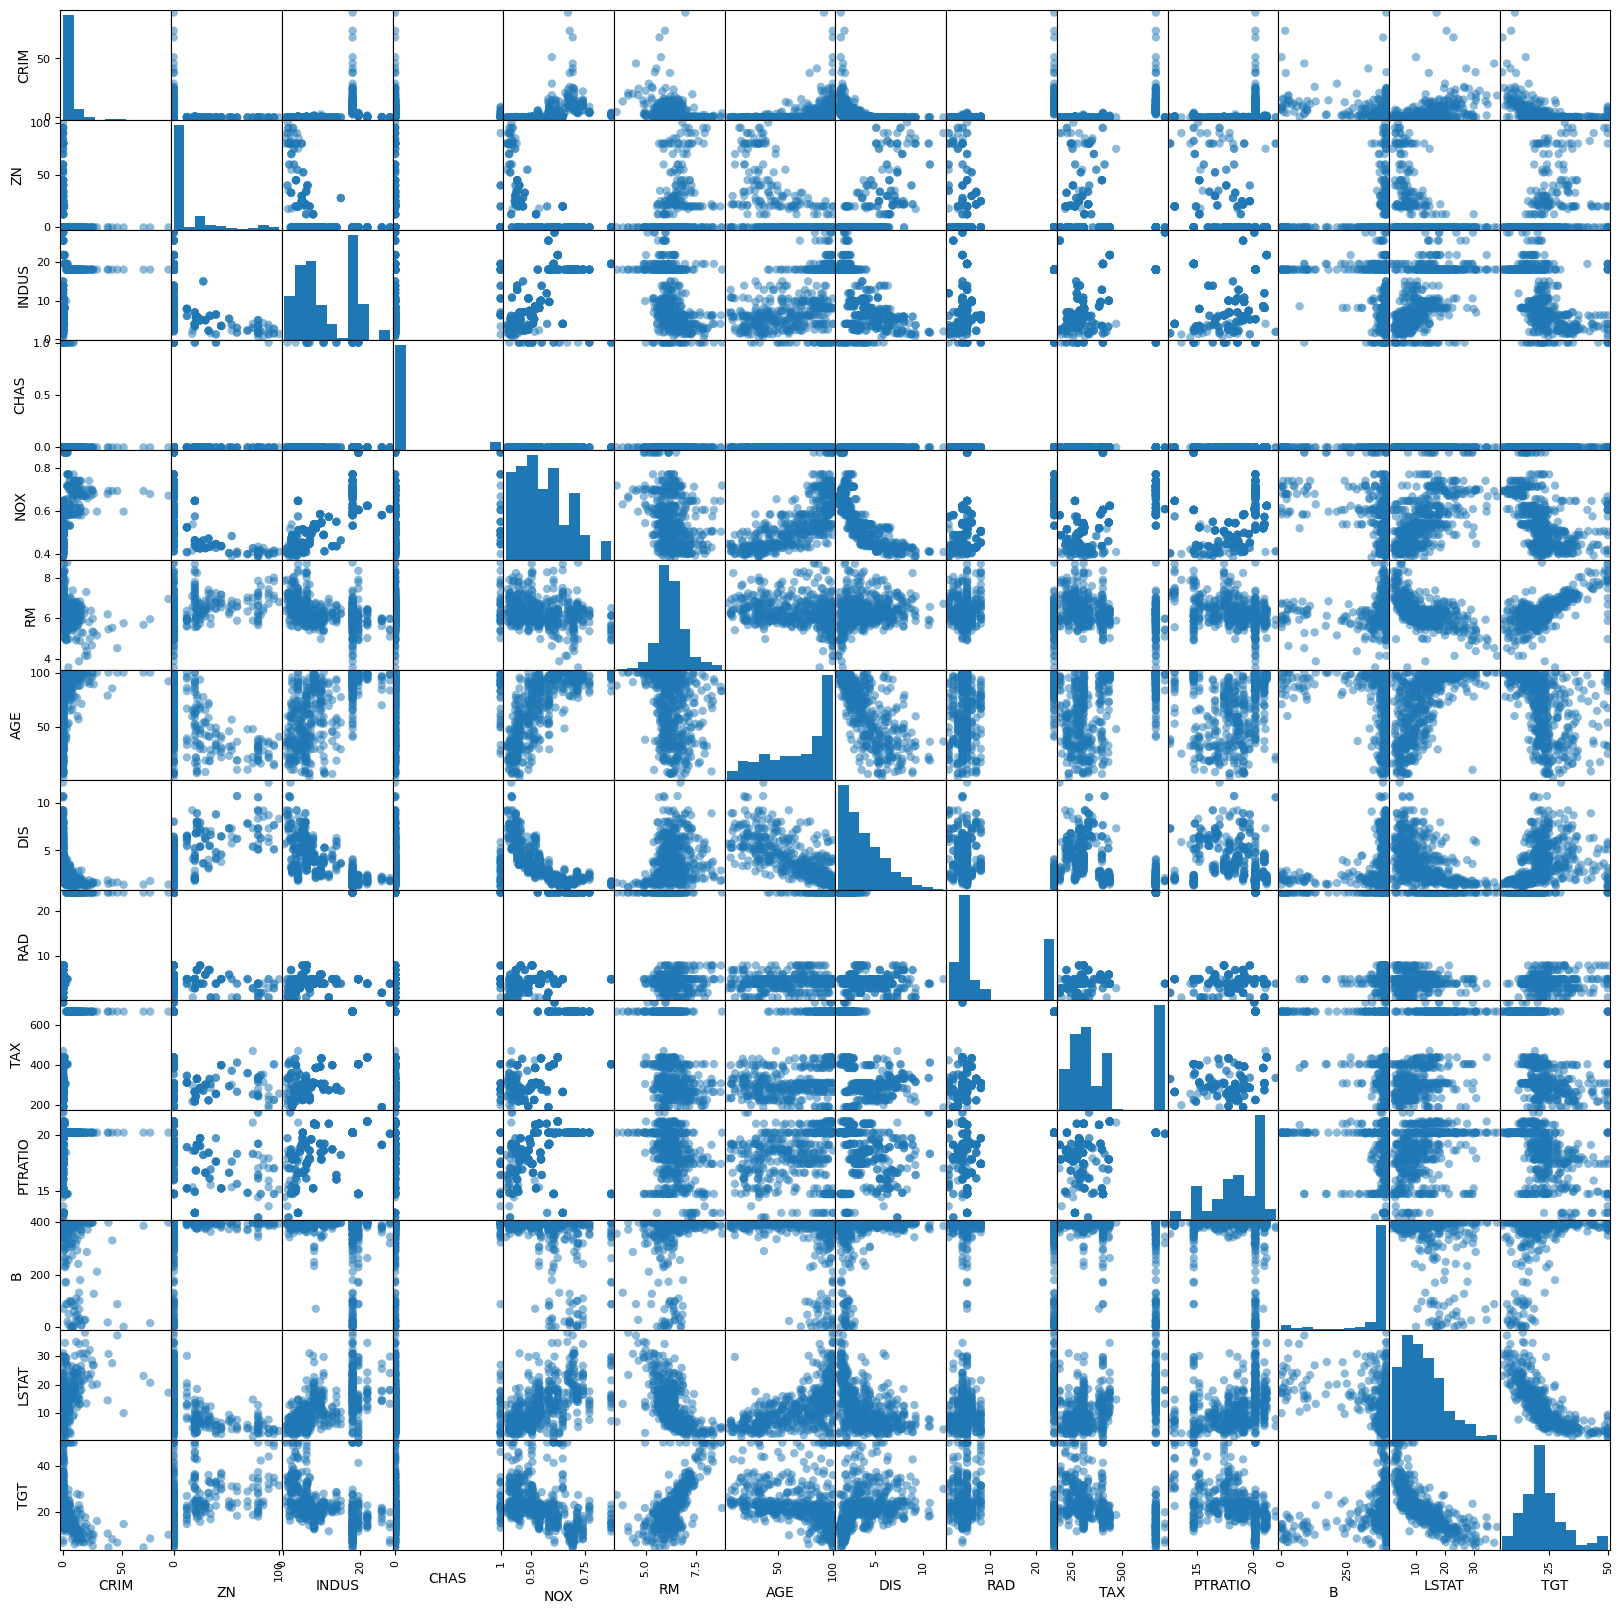

In [12]:
pd.plotting.scatter_matrix(eData, figsize=(20,20), marker='o');

<AxesSubplot: >

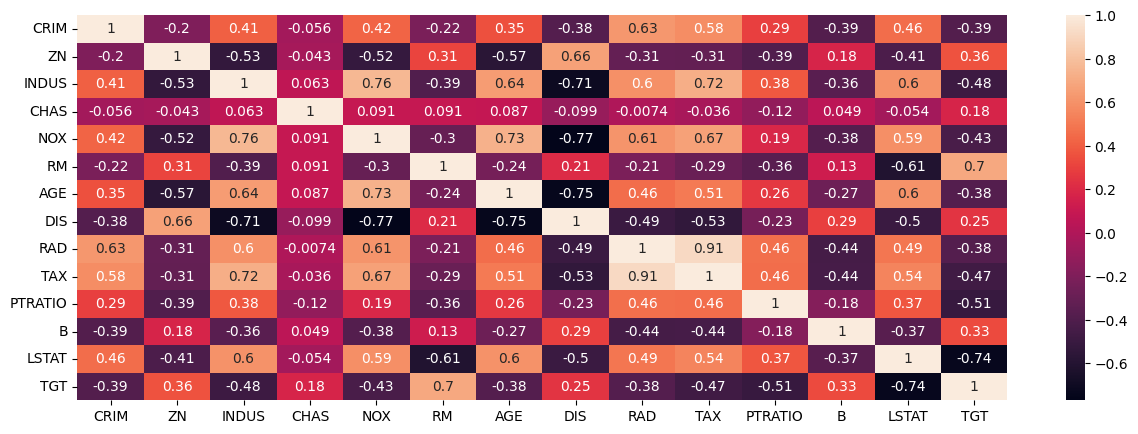

In [13]:
corr = eData.corr()
plt.figure(figsize = (15,5))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)

### Analyse von Untermengen

Zugriff auf die Variable `CRIM` (Pro-Kopf-Verbrechensrate nach Stadt):

In [14]:
eData['CRIM']

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

Filtern des Dataframes auf `CRIM > 20`:

In [15]:
eData.query('CRIM > 20')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
378,23.6482,0.0,18.1,0,0.671,6.380,96.2,1.3861,24,666.0,20.2,396.90,23.69,13.1
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666.0,20.2,396.90,17.21,10.4
384,20.0849,0.0,18.1,0,0.700,4.368,91.2,1.4395,24,666.0,20.2,285.83,30.63,8.8
386,24.3938,0.0,18.1,0,0.700,4.652,100.0,1.4672,24,666.0,20.2,396.90,28.28,10.5
387,22.5971,0.0,18.1,0,0.700,5.000,89.5,1.5184,24,666.0,20.2,396.90,31.99,7.4
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666.0,20.2,396.90,30.59,5.0
400,25.0461,0.0,18.1,0,0.693,5.987,100.0,1.5888,24,666.0,20.2,396.90,26.77,5.6
403,24.8017,0.0,18.1,0,0.693,5.349,96.0,1.7028,24,666.0,20.2,396.90,19.77,8.3
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666.0,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666.0,20.2,384.97,22.98,5.0


Darstellung der Häufigkeitsverteilung zwischen `LSTAT` und `ZN`:

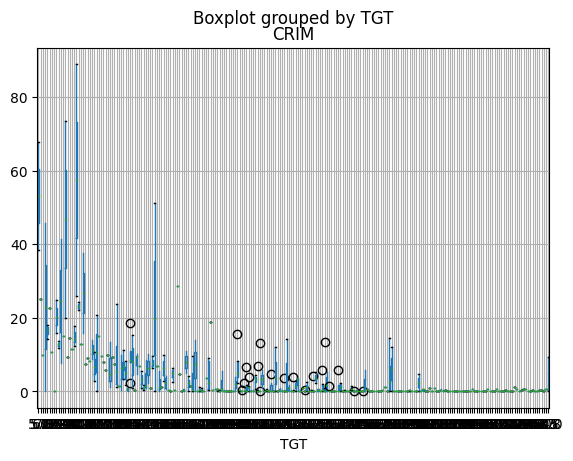

In [16]:
pd.DataFrame.boxplot(eData, column='CRIM', by='TGT');

## Fragen

##### Welche der Variablen sind kategorisch? 

`CHAS` ist eine kategorische Variable und kann die Werte 0 und 1 annehmen.

##### Welche der Variablen eignen sich gut zur Vorhersage des Hauspreises und warum? 

- `LSTAT`: Umso höher `LSTAT`, desto niedriger ist tendenziell `TGT`.
- `RM`: Umso höher `RM`, desto höher ist tendenziell `TGT`.

##### Welche dieser Variablen sind miteinander korreliert? 

- `LSTAT` und `RM` korrelieren mit einem Wert von `-0.61`.

##### Welche sind daher Kandidaten, die man evtl. weglassen könnte?

Die Korrelation ist nicht so stark, dass ich eine der Variablen weglassen würde.